In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#空值本地化填充
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

X = np.array([0, 1, 2, np.nan]).reshape(-1, 1)
y = [0, 0, 1, 1]

gbdt = HistGradientBoostingClassifier(min_samples_leaf=1).fit(X, y)
print(gbdt.predict(X))

In [21]:
data = pd.read_excel(r"C:\Users\李金斗\Desktop\测试聚类.xlsx")
data.head()

,company_id,company_name_x,注册资本,公司类型,融资信息,分支机构数量,近两年地址变更次数,企业专利数量,时间戳
0,0161e22530613e5df4a811e974937b13,北京车速信息技术有限公司,100.0,有限责任公司(自然人投资或控股),Pre-A轮,0,0,0,1.398614e+09
1,096ee613ec041259189deed9ae37da2b,北京三个逗号科技有限公司,35144.5,有限责任公司(台港澳法人独资),A轮,0,2,1,1.509466e+09
2,20fb2048bedbeb3cef5998f2f17d8dad,八斗猫（北京）人工智能技术有限公司,100.0,有限责任公司(自然人投资或控股),天使轮,0,2,0,1.510502e+09
3,1f606c45ab04459269f2deb9e35faf7c,北京酷粉网络科技有限公司,500.0,其他有限责任公司,天使轮,0,0,0,1.049990e+09
4,26f0db5a26d42a68568bea3bcccb8214,北京石更化贝文化传媒有限公司,500.0,有限责任公司(自然人投资或控股),天使轮,0,1,0,1.466352e+09


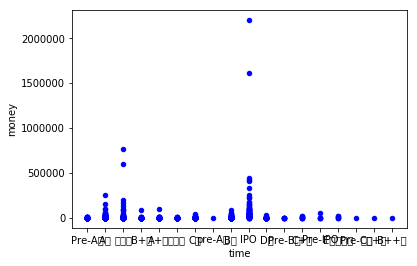

In [7]:
X = data.iloc[:,[4,2]]#取data两列为x变量
X = np.array(X.values)
plt.scatter(X[:,0],X[:,1],s = 20,marker = "o",c = "b")
plt.xlabel("time")
plt.ylabel("money")
plt.show()

In [28]:
df = data.iloc[:,2:9]
df.head()

,注册资本,公司类型,融资信息,分支机构数量,近两年地址变更次数,企业专利数量,时间戳
0,100.0,有限责任公司(自然人投资或控股),Pre-A轮,0,0,0,1.398614e+09
1,35144.5,有限责任公司(台港澳法人独资),A轮,0,2,1,1.509466e+09
2,100.0,有限责任公司(自然人投资或控股),天使轮,0,2,0,1.510502e+09
3,500.0,其他有限责任公司,天使轮,0,0,0,1.049990e+09
4,500.0,有限责任公司(自然人投资或控股),天使轮,0,1,0,1.466352e+09


In [29]:
df_num = pd.get_dummies(df)
df_num.head()

,注册资本,分支机构数量,近两年地址变更次数,企业专利数量,时间戳,公司类型_其他外商投资股份有限公司,公司类型_其他有限责任公司,公司类型_其他有限责任公司分公司,公司类型_其他股份有限公司(上市),公司类型_其他股份有限公司(非上市),...,融资信息_E轮及以后,融资信息_IPO,融资信息_Pre-A轮,融资信息_Pre-B轮,融资信息_Pre-C轮,融资信息_Pre-IPO,融资信息_pre-A轮,融资信息_天使+轮,融资信息_天使轮,融资信息_种子轮
0,100.0,0,0,0,1.398614e+09,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,35144.5,0,2,1,1.509466e+09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100.0,0,2,0,1.510502e+09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,500.0,0,0,0,1.049990e+09,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,500.0,0,1,0,1.466352e+09,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
#数据标准化处理
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer
std = StandardScaler()
data1 = std.fit_transform(df_num)
print(data)

                            company_id      company_name_x          注册资本  \
0     0161e22530613e5df4a811e974937b13        北京车速信息技术有限公司    100.000000   
1     096ee613ec041259189deed9ae37da2b        北京三个逗号科技有限公司  35144.500000   
2     20fb2048bedbeb3cef5998f2f17d8dad   八斗猫（北京）人工智能技术有限公司    100.000000   
3     1f606c45ab04459269f2deb9e35faf7c        北京酷粉网络科技有限公司    500.000000   
4     26f0db5a26d42a68568bea3bcccb8214      北京石更化贝文化传媒有限公司    500.000000   
5     87f89d13fe8a51e8612c75da22e09a49        北京彼尔文化传播有限公司   1250.000000   
6     a5464cc0912c8b23312371d550c90fad        北京奇立软件技术有限公司    152.941100   
7     a8cb7b20bfc71c053299d9e0514c2625        北京看我文化创意有限公司   1000.000000   
8     f49111bc48cd7a22db1f72b79292a492        北京乐铺网络科技有限公司    246.479100   
9     1423e2b328f789e3d1e87a84535eb84a        北京盛辉印象科技有限公司    104.166700   
10    b831da1aa29c732d9779b833dcd13d02        北京聚美妈妈科技有限公司    197.000000   
11    ae8f25bc806582be4b747c5c17ff005b       北京喜小宝网络科技有限公司    317.810000   
12    a3beb0

C:\Users\Public\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Public\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [63]:
from sklearn.cluster import KMeans
n_clusters = 3
kmean = KMeans(n_clusters)
kmean.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
from sklearn import metrics
y_pred = kmean.predict(data1)#预测每个x对应的类簇
print(metrics.calinski_harabaz_score(data1,y_pred))#采用CH指标评估聚类结果
labels = kmean.labels_ #输出每一个样本的聚类的类簇标签
centers = kmean.cluster_centers_#输出聚类的类簇中心点
print("各类簇标签值：{}".format(labels))
print("各类簇中心:",centers)

107.70903524387614
各类簇标签值：[1 0 1 ... 0 1 0]
各类簇中心: [[-2.06603425e-02  1.37584279e-02 -9.61444338e-03 -5.48170158e-03
  -5.51686730e-02  3.76574178e-02  9.56956926e-01 -1.70548170e-02
  -1.01400302e-01  2.26358169e-01  1.45703579e-02  2.58517805e-01
   1.34043539e-01  1.54641054e-01 -1.70548170e-02 -1.70548170e-02
   1.44340436e-01  7.53477169e-02  3.29005017e-02 -1.70548170e-02
   4.55324823e-01 -1.18055760e+00 -1.87571961e-01  3.36462254e-02
  -1.70548170e-02 -1.70548170e-02 -8.55732933e-02 -3.41245258e-02
   9.97192154e-02 -3.81579344e-02  3.76574178e-02 -2.41226620e-02
   1.98674349e-01  9.48073889e-02  1.59523662e-01  3.76574178e-02
   7.06449819e-02 -3.05178863e-01  1.13103923e-01  1.45141717e-01
   9.29446503e-02  9.23086068e-02 -1.60152030e-01  8.37753747e-03
   1.69298179e-02  3.76574178e-02  8.42535734e-02 -1.70548170e-02
   3.76574178e-02 -4.04303134e-02 -8.33258570e-02]
 [-8.59490273e-02 -9.35990056e-02  1.58111309e-02 -1.10300542e-01
   2.11316952e-01 -1.70548170e-02 -5.182

In [22]:
r = pd.concat([data, pd.Series(labels, index = data.index)], axis = 1)
r.columns = list(data.columns) + [u'聚类类别']
r.to_excel(r"C:\Users\李金斗\Desktop\聚类结果.xlsx")

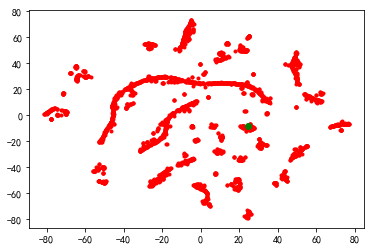

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data1) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = data.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
# d = tsne[r[u'聚类类别'] == 2]
# plt.plot(d[0], d[1], 'b*')
# d = tsne[r[u'聚类类别'] == 3]
# plt.plot(d[0], d[1], 'g')
# d = tsne[r[u'聚类类别'] == 4]
# plt.plot(d[0], d[1], 'c')
# d = tsne[r[u'聚类类别'] == 5]
# plt.plot(d[0], d[1], 'm')
# d = tsne[r[u'聚类类别'] == 6]
# plt.plot(d[0], d[1], 'y')
plt.show()

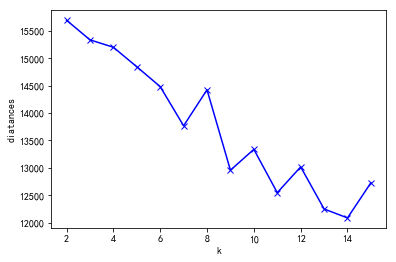

In [26]:
#设置k一定的取值范围进行聚类并评价不同的聚类结果
from scipy.spatial.distance import cdist
#类簇的数量2-9
clusters = range(2,16)
#距离函数
distances_sum = []
for k in clusters:
    kmeans_model = KMeans(n_clusters = k).fit(data1)#对不同取值k进行训练
    #计算各对象到其类簇中心的欧式距离，生成距离表
    distances_point = cdist(data1,kmeans_model.cluster_centers_,"euclidean")
    #提取每个对象到其类簇中心的距离（该距离最短，所以用min函数），并相加
    distances_cluster = sum(np.min(distances_point,axis = 1))
    #依次存入类簇数从2-9的距离结果
    distances_sum.append(distances_cluster)
plt.plot(clusters,distances_sum,"bx-")#画出不同聚类结果下的距离总和
plt.xlabel("k")
plt.ylabel('diatances')
plt.show()

In [60]:
#预测分数
from sklearn import metrics
import math
print(metrics.silhouette_score(data1,y_pred))
print(metrics.silhouette_samples(data1,y_pred))

0.1742937110102472
[-0.14909187  0.06083959  0.22220157 ...  0.19513867  0.05038148
  0.08584003]


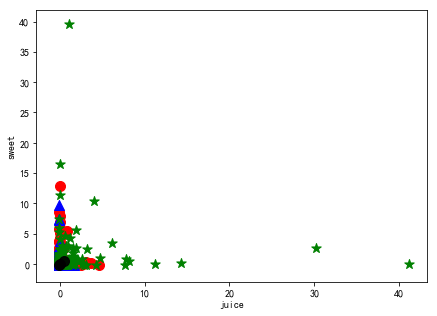

In [72]:
#聚类结果及其各类簇中心点的可视化
markers = ["o","^","*"]
colors = ["r","b","g"]
plt.figure(figsize = (7,5))
for c in range(n_clusters):
    cluster = data1[labels == c]#根据不同分类值c筛选x
    #按照c的不同取值选取相应样本点，标记，颜色，画散点图
    plt.scatter(cluster[:,0],cluster[:,1],marker = markers[c],s = 100,c = colors[c])
#画出每个类簇中心点
plt.scatter(centers[:,0],centers[:,1],marker = "o",c = "black",alpha = 0.9,s = 100)
#设置坐标轴的label
plt.xlabel("juice")
plt.ylabel("sweet")
plt.show()